In [56]:
import json
import glob
import logging 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
logger = logging.getLogger(__name__)

In [43]:
df_uk = pd.read_csv("../data/processed/UK.csv")
df_uk.head()

,description,maintext,source_domain,title,url,language,date_publish
0,The strategy goes well beyond defeating an opp...,How to make sense of the sheer intensity of Is...,www.theguardian.com,Israel’s use of disproportionate force is a lo...,https://www.theguardian.com/commentisfree/2023...,en,2023-12-05 12:47:14
1,All the conflict in Gaza is achieving is civil...,All the conflict in Gaza is achieving is civil...,www.unitedkingdomnews.net,"Israel cant defeat Hamas in battle, so what's ...",https://www.unitedkingdomnews.net/news/2740561...,en,2024-02-06 00:00:00
2,"Mexico has launched its army-run airline, with...",For free real time breaking news alerts sent s...,www.independent.co.uk,"Mexico's army-run airline takes to the skies, ...",https://www.independent.co.uk/news/andres-manu...,en,2023-12-26 17:08:10
3,This blog is now closed.,From 23 Dec 2023 18.49 CET UNRWA: 'People in G...,www.theguardian.com,"Death toll from Israeli attacks tops 20,000 - ...",https://www.theguardian.com/world/live/2023/de...,en,2023-12-24 00:17:56
4,Palestinian Islamic Jihad posts videos of two ...,The BBC will not be broadcasting the clip itse...,www.bbc.co.uk,Israel sees 'sign of life' in Gaza hostage video,https://www.bbc.co.uk/news/world-middle-east-6...,en,2023-11-09 18:57:24


In [33]:
df_uk.shape

(1398, 7)

<Axes: xlabel='source_domain'>

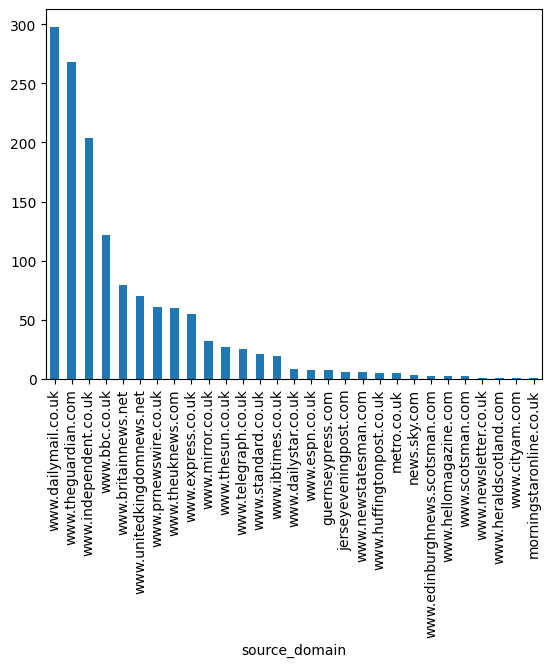

In [45]:
df_uk["source_domain"].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

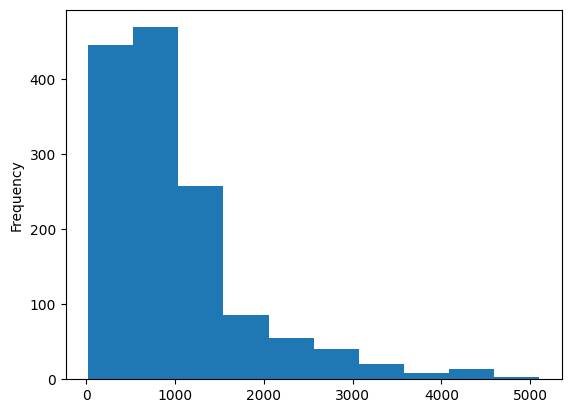

In [49]:
df_uk['maintext'].apply(lambda x: len(x.split(' '))).plot(kind='hist', bins=10)

In [104]:
titles = df_uk.title.values
texts = df_uk.maintext.values

In [72]:
cv = CountVectorizer(min_df=2, stop_words='english')
tfidf = TfidfVectorizer(min_df=2, stop_words='english')

In [73]:
cv_words = cv.fit_transform(df_uk['title'])
tf_idf_words = tfidf.fit_transform(df_uk['title'])

In [74]:
tf_idf_feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sorting = np.argsort(tf_idf_words.toarray()).flatten()[::-1]

In [75]:
cv_feature_array = np.array(cv.get_feature_names_out())
cv_sorting = np.argsort(cv_words.toarray()).flatten()[::-1]

In [76]:
n = 30
top_n = tf_idf_feature_array[tfidf_sorting][:n]
top_n

array(['framework', 'outline', 'accession', 'soon', 'eu', 'kyiv', 'talks',
       'ukraine', 'exploding', 'explosions', 'exchange', 'exclusive',
       'execute', 'extended', 'executions', 'exercise', 'exercises',
       'expanding', 'expands', 'export', 'expected', 'explosion',
       'expects', 'expelled', 'exactly', 'expert', 'experts',
       'explanation', 'explosives', 'explode'], dtype=object)

In [78]:
n = 30
top_n = cv_feature_array[cv_sorting][:n]
top_n

array(['soon', 'framework', 'outline', 'eu', 'ukraine', 'accession',
       'kyiv', 'talks', 'explosion', 'expected', 'exchange', 'exclusive',
       'execute', 'extended', 'executions', 'exercise', 'exercises',
       'expanding', 'expands', 'export', 'explosives', 'exploding',
       'expects', 'expelled', 'exactly', 'expert', 'experts',
       'explanation', 'explosions', 'explode'], dtype=object)

In [107]:
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(titles)

In [108]:
topic_model.get_topic_info().head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,375,-1_gaza_in_the_war,"[gaza, in, the, war, to, as, of, israel, and, ...",[Ukraine-Russia war live: 28 killed in Kyiv st...
1,0,89,0_yemen_houthi_sea_red,"[yemen, houthi, sea, red, houthis, rebels, shi...",[Japan condemns Yemen's Houthi rebels hijack o...
2,1,79,1_hostages_hostage_hamas_israeli,"[hostages, hostage, hamas, israeli, israel, re...","[Goodbye, my brave daughter: Heartbroken mothe..."
3,2,61,2_market_research_billion_reach,"[market, research, billion, reach, stratview, ...",[Aircraft EWIS Market is Forecast to Reach US$...
4,3,48,3_syria_iraq_drone_us,"[syria, iraq, drone, us, iranbacked, airstrike...",[US launches airstrikes on Iran-backed terrori...


In [109]:
topic_df = pd.DataFrame({'topic': topics, 'document': titles})

In [110]:
topic_1 = topic_df[topic_df.topic == -1]
topic_1.document.values

array(["Mexico's army-run airline takes to the skies, with first flight to the resort of Tulum",
       'Death toll from Israeli attacks tops 20,000 - As it happened',
       'British Defense Ministry Cites Intense Ground Combat in Ukraine',
       'New hope for truce in Gaza as Hamas leader flies to Egypt for talks and Israel says it is willing to agree to another pause in exchange for hostages amid growing UN pressure',
       'Hundreds of prisoners of war freed after exchange between Russia and Ukraine',
       "Is Putin worried he could LOSE next year's Russian election? Kremlin is 'inexplicably concerned' about the outcome and paying close attention anti-war protests",
       "Wagner Group Mercenaries Become Part of Russia's National Guard",
       "Israeli forces engage with Hamas fighters near Gaza City's Shifa Hospital which IDF believes sits on top of the terrorist group's HQ",
       'UN reports surge in people fleeing to Rafah as fighting intensifies - as it happened',
     

In [115]:
topic_model.visualize_topics()